In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


print("Hello World!!!")
import os
print(os.listdir("./Homework/"))

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

import warnings
warnings.filterwarnings('ignore')

Hello World!!!
['homework clustering.ipynb', '.~lock.geo.xlsx#', '.ipynb_checkpoints', 'geo.xlsx', 'geo_comment.xlsx']


In [22]:
#dfs = pd.read_excel(file_name, sheet_name=None)
data = pd.read_excel('./Homework/geo.xlsx', sheet='Sheet1')
print("train shape ===================================================")
print(data.shape)
print("train indexes Columns dtypes NaN ===================================================")
print(data.info())
# Альтернативный способ 
#for line in zip(train.index, train.columns, train.dtypes,  train.isnull().any()):
#    print(line)

train shape ===================================================
(108806, 3)
train indexes Columns dtypes NaN ===================================================
<class 'pandas.core.frame.DataFrame'>
Int64Index: 108806 entries, 0 to 108805
Data columns (total 3 columns):
x                108806 non-null float64
y                108806 non-null float64
comment_class    108806 non-null int64
dtypes: float64(2), int64(1)
memory usage: 3.3 MB
None


In [23]:
data.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [24]:
X = data[['x', 'y']].iloc[::15]
Y = data[['comment_class']].iloc[::15]
scaler = StandardScaler()
X[['x']] = scaler.fit_transform(X[['x']])
X[['y']] = scaler.fit_transform(X[['y']])
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7254 entries, 0 to 108795
Data columns (total 2 columns):
x    7254 non-null float64
y    7254 non-null float64
dtypes: float64(2)
memory usage: 170.0 KB
None


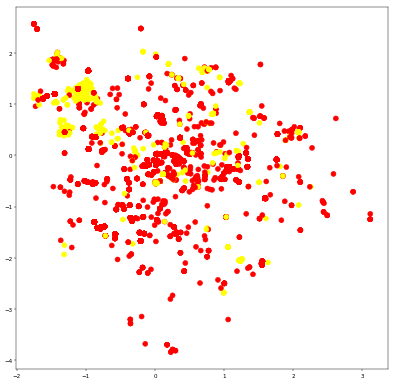

In [25]:
plt.figure(figsize=(12, 12), dpi=40)
plt.scatter(X['x'], X['y'], c=Y['comment_class'], cmap='autumn', s=80)
y = Y['comment_class'].values

In [26]:
algorithms = [
    AffinityPropagation(),
    KMeans(n_clusters=4),
    AgglomerativeClustering(n_clusters=4),
    DBSCAN(),
]

In [27]:
clusters_random = np.random.randint(low=0, high=2, size=len(X))

In [28]:
def get_descr(algo_name, _y, y_pred, _X):
    return "{}\nARI {:.2f}\nSilhouette {:.2f}".format(
        algo_name,
        adjusted_rand_score(_y, y_pred),
        silhouette_score(_X, y_pred)
    )

In [29]:
centroids = []
clusters_map = []
i = 0
for algorithm in algorithms:
    # кластеризуем и выводим картинку
    clusters = algorithm.fit_predict(X.values)
    clusters_map.append(clusters)

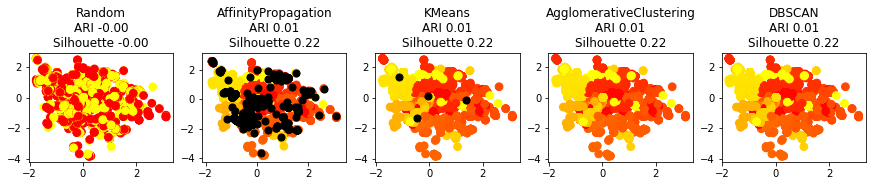

In [30]:
i = 0
fig, axes = plt.subplots(1, 5, figsize=(15, 2))
axes[0].scatter(X['x'].values, X['y'].values, c=clusters_random, cmap='autumn', s=60)
descr = get_descr("Random", y, clusters_random, X.values)
axes[0].set_title(descr)
for ax, algorithm in zip(axes[1:], algorithms):
    ax.scatter(X['x'], X['y'], c=clusters_map[i], cmap='autumn', s=60)
    ax.set_title(get_descr(algorithm.__class__.__name__, y, clusters_map[i], X.values))
    # если есть центры кластеров - выведем их
    if algorithm.__class__.__name__ in {'KMeans', 'AffinityPropagation'}:
            centers = algorithm.cluster_centers_
            ax.scatter(centers[:, 0], centers[:, 1], s=50, c='black')

In [31]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X, )
    k_inertia.append(clf_kmeans.inertia_)

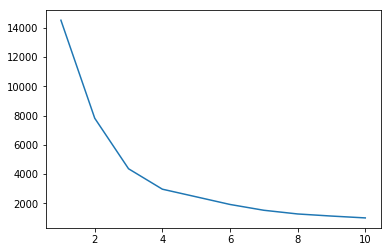

In [32]:
plt.plot(ks, k_inertia)

In [33]:
diff = np.diff(k_inertia)

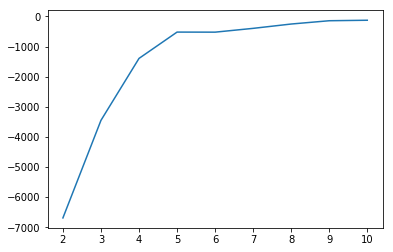

In [34]:
plt.plot(ks[1:], diff)

In [35]:
diff_r = diff[1:] / diff[:-1]

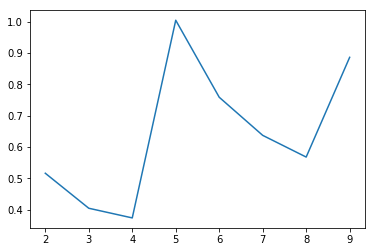

In [36]:
plt.plot(ks[1:-1], diff_r)

In [37]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

4